In [1]:
%load_ext autoreload

In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('../../analysis')))
from xa.proc.exp import Experiment

x = Experiment(
    name="Asymmetric Run 1h",
    i1='sockshop-2024-01-20T16-27-17/asym30m/1',
    i2='sockshop-2024-01-20T16-27-17/asym30m/2',
    i3='sockshop-2024-01-20T16-27-17/asym30m/3',
    # ... add more iterations here
)

In [3]:
import pandas as pd
import numpy as np

# (un)comment for selecting display precision for floats
pd.options.display.float_format = None # reset
pd.options.display.float_format = np.format_float_positional # dynamic
# pd.options.display.float_format = "{:.2f}".format # fixed

# N = number of elements
# numpy.std is biased, divides by N (population), ddof by default is 0
# pandas.std is unbiased, divides by N-1 (sample), ddof by default is 1

x.stats

count               mean           std bias  \
iter stat                                                               
i1   cpu usage            5746. 1.5160402956839545  1.805240836167222   
     memory usage         5746.  0.724061957535677 0.7639701506472237   
     request latency      1800.  37923262.75611111 204346081.48411742   
     request throughput   1800.  18.80254086504207  4.633411482320731   
     response time      968175.  2.287974379492619  6.405696477269608   
i2   cpu usage            5744.  3.418716120821727   4.28076262530994   
     memory usage         5744. 0.7329624402855154 0.7819898099797474   
     request latency      1800.  38000793.36277778 204194415.73631144   
     request throughput   1800. 18.804669293930655  4.633961621473221   
     response time      970725.  2.268194570274135  5.946314311201569   
i3   cpu usage            5747. 1.6694031884461458  1.969251629829238   
     memory usage         5747. 0.7575407423003305 0.8444593614953265   
     request latency      1800.  38011414.68277778 204016209.54709443   
     request throughput   1800. 18.807161412976804  4.642134375226578   
     response time      972520. 2.2979708638125977  6.356069648741727   

                                std unbias               min  \
iter stat                                                      
i1   cpu usage          1.8053979434157827          0.003636   
     memory usage       0.7640366377584977          0.031327   
     request latency    204402867.94665146          2123417.   
     request throughput  4.634699077588693 2.720857700920075   
     response time       6.405699785401629         0.0000001   
i2   cpu usage            4.28113530303017           0.00583   
     memory usage       0.7820578890126523          0.030351   
     request latency    204251160.05190906          1995438.   
     request throughput 4.6352493696213175 2.721582994972868   
     response time       5.946317374025182         0.0000001   
i3   cpu usage          1.9694229808523884          0.003996   
     memory usage       0.8445328406654891          0.030303   
     request latency     204072904.3403375          2072477.   
     request throughput  4.643424394530409 2.720531630205413   
     response time       6.356072916579175         0.0000001   

                                       25%                50%  \
iter stat                                                       
i1   cpu usage                  0.21024825          0.5526695   
     memory usage                 0.195497           0.357509   
     request latency             5412561.5           5809724.   
     request throughput 15.993467831118824 17.946889871447333   
     response time               0.0000446        0.000168602   
i2   cpu usage                  0.52112325          1.1902385   
     memory usage                 0.140148           0.362277   
     request latency              5526548.          5946641.5   
     request throughput   15.9930910795825  17.94218632331613   
     response time             0.000046701        0.000175502   
i3   cpu usage                   0.2458695           0.616353   
     memory usage                 0.168768           0.338877   
     request latency            5409722.75          5818778.5   
     request throughput 15.993385438380933 17.944132511299628   
     response time             0.000044401        0.000167402   

                                       75%                max  \
iter stat                                                       
i1   cpu usage                  2.72077225           9.774296   
     memory usage                 1.150937           4.114967   
     request latency              6336194.        7605182160.   
     request throughput 19.957057307695003  42.82781690283533   
     response time             0.022815511      313.939792117   
i2   cpu usage          5.0779907500000006          21.438891   
     memory usage                 1.150656            4.19812   
    

In [4]:
x.summary

,mean of means,std of means bias,std of means unbias
cpu usage,2.2013865349839423,0.8630560177400967,1.0570234314508318
response time,2.2847132711931173,0.012372901430895556,0.015153647571722986
memory usage,0.7381883800405077,0.014158391906606841,0.01734041787476891
request throughput,18.804790523983176,0.0018882775834997765,0.0023126582861550545
request latency,37978490.26722222,39291.742960251235,48122.36067860427


In [5]:
%autoreload 2
from xa.draw.plot import Figure, Pairwise

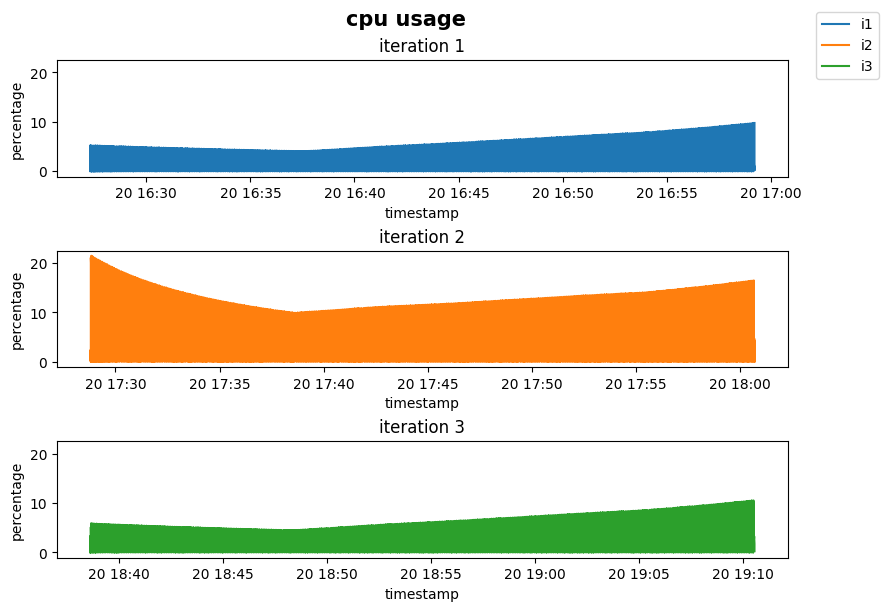

In [6]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.cpu.usage.TS, y=x.i1.metric.cpu.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.cpu.usage.TS, y=x.i2.metric.cpu.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.cpu.usage.TS, y=x.i3.metric.cpu.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='cpu usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

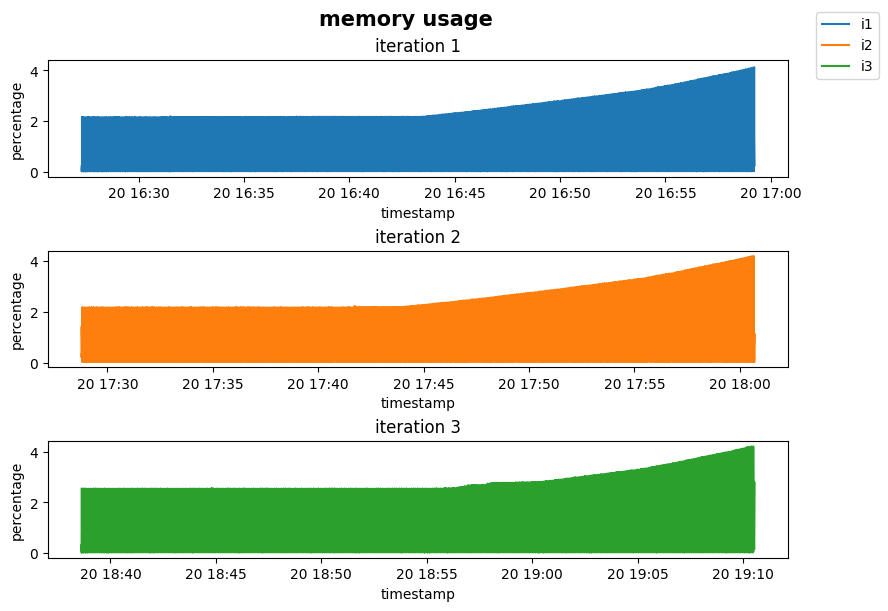

In [7]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.memory.usage.TS, y=x.i1.metric.memory.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.memory.usage.TS, y=x.i2.metric.memory.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.memory.usage.TS, y=x.i3.metric.memory.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='memory usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

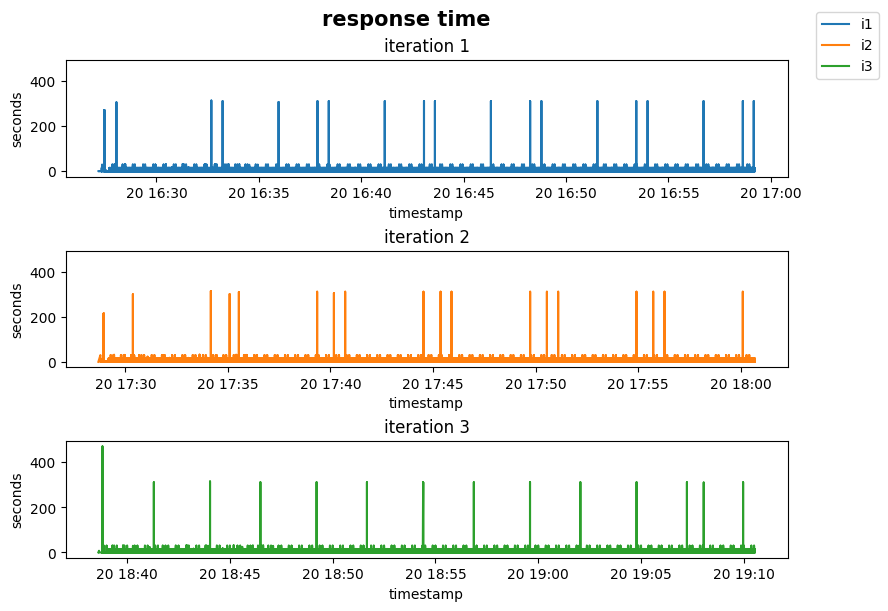

In [8]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.response.time.TS, y=x.i1.metric.response.time.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.response.time.TS, y=x.i2.metric.response.time.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.response.time.TS, y=x.i3.metric.response.time.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='response time', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

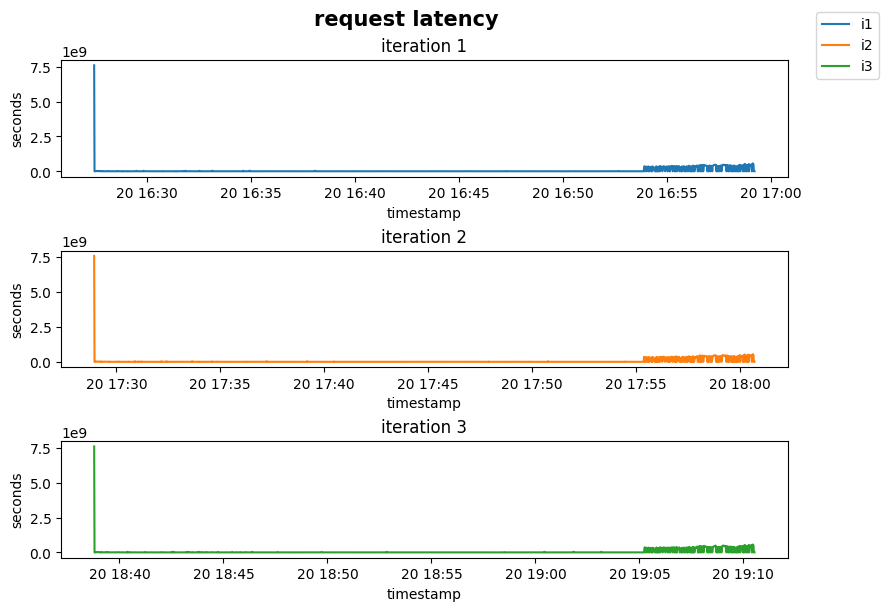

In [9]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.latency.TS, y=x.i1.metric.request.latency.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.request.latency.TS, y=x.i2.metric.request.latency.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.request.latency.TS, y=x.i3.metric.request.latency.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='request latency', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

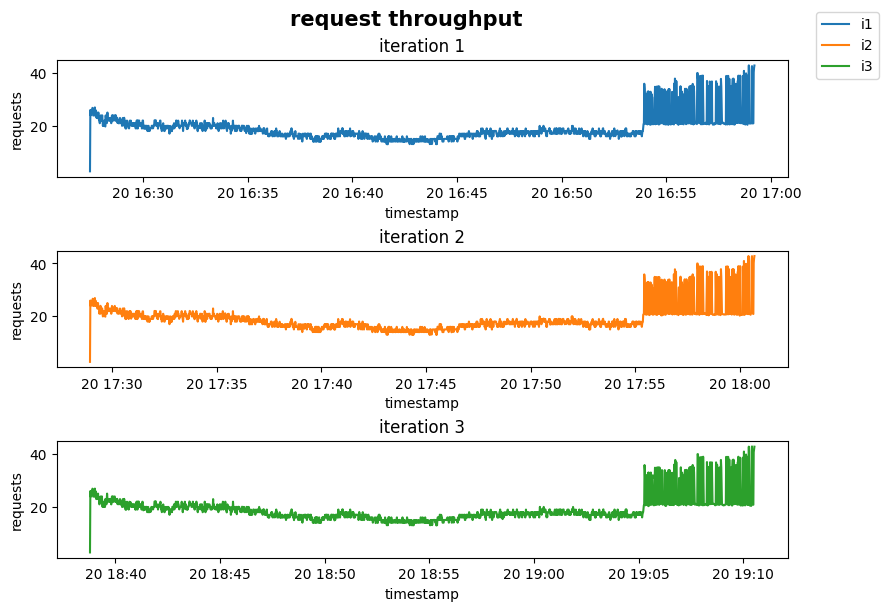

In [10]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.throughput.TS, y=x.i1.metric.request.throughput.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i2.metric.request.throughput.TS, y=x.i2.metric.request.throughput.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i3.metric.request.throughput.TS, y=x.i3.metric.request.throughput.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='requests'),
    title='request throughput', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig